In [1]:
import navierPy as nav
#reload navierPy
import importlib
importlib.reload(nav)
ui=1.5

ix,jy,t_end=nav.init_nav(ui)

t=0
print(ix,jy,t_end)
uL=[]
vL=[]
pL=[]
zetaL=[]
t_end=0.0
tL=[]
while t<t_end:
    t,iters=nav.py_time_step()
    if iters%10==0:
        u,v,p,zeta=nav.get_uvp(ix,jy)
        uL.append(u)
        vL.append(v)
        pL.append(p)
        zetaL.append(zeta)
        tL.append(t)

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
uL=np.array(uL)
vL=np.array(vL)
pL=np.array(pL)
tL=np.array(tL)
zetaL=np.array(zetaL)
ds=xr.Dataset({'u':(['time','y','x'],uL),
                'v':(['time','y','x'],vL),
                'p':(['time','y','x'],pL),
                't':(['time'],tL),
                'zeta':(['time','y','x'],zetaL)})

660 120 40.0
0 t:.0111111, del_t:.0111111, SOR iters:010, res:153.7701416, bcells:694
1 t:.0196107, del_t:.0084996, SOR iters:010, res:121.8671646, bcells:694
2 t:.0276283, del_t:.0080176, SOR iters:010, res:60.6352577, bcells:694
3 t:.0350983, del_t:.0074700, SOR iters:010, res:36.9333496, bcells:694
4 t:.0422012, del_t:.0071029, SOR iters:010, res:33.1382713, bcells:694
5 t:.0490188, del_t:.0068176, SOR iters:010, res:39.2757988, bcells:694
6 t:.0556538, del_t:.0066350, SOR iters:010, res:46.9600029, bcells:694
7 t:.0622249, del_t:.0065710, SOR iters:010, res:51.1858215, bcells:694
8 t:.0688483, del_t:.0066234, SOR iters:010, res:48.8314819, bcells:694
9 t:.0756360, del_t:.0067877, SOR iters:010, res:41.0842209, bcells:694
10 t:.0825946, del_t:.0069586, SOR iters:010, res:32.6711426, bcells:694
11 t:.0898010, del_t:.0072065, SOR iters:010, res:25.6923370, bcells:694
12 t:.0973104, del_t:.0075094, SOR iters:010, res:20.7623253, bcells:694
13 t:.1051516, del_t:.0078412, SOR iters:010, 

In [2]:
ds.to_netcdf('navier_ui_1.5.nc',encoding={'u':{'zlib':True},'v':{'zlib':True},'p':{'zlib':True},'zeta':{'zlib':True}})

394
0.10154962539672852


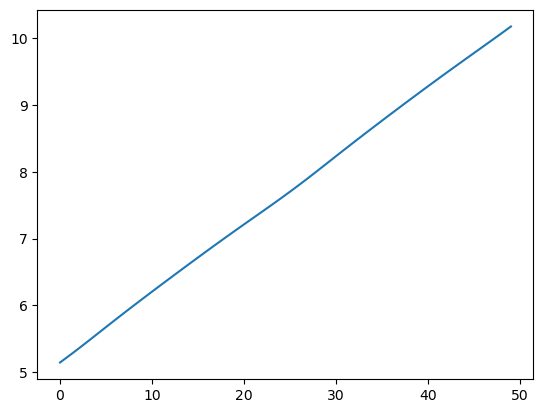

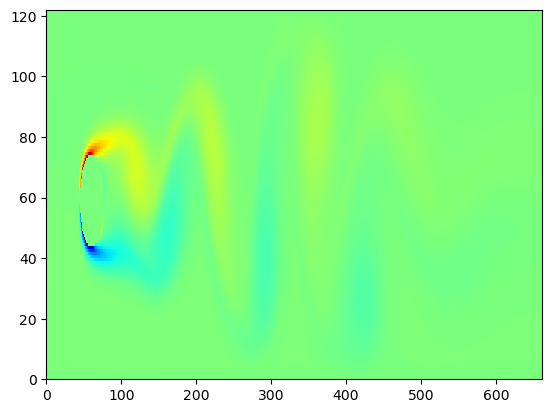

In [4]:
plt.plot(tL[50:100])
plt.figure()
print(len(tL))
plt.pcolormesh(zetaL[-150,:,:].T,cmap='jet')
print(tL[51]-tL[50])
#print(uL[0,0,:])